In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# reading the data in a datafram
df = pd.read_csv('../input/sales-forecasting/train.csv') 

In [11]:
# see the data shape 
df.shape

(9800, 18)

In [12]:
# see first 5 rows 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [24]:
# see a random sample from the data 
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4422,4423,CA-2018-159464,18/05/2018,19/05/2018,First Class,TB-21355,Todd Boyes,Corporate,United States,Sandy Springs,Georgia,30328.0,South,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",17.240
4474,4475,CA-2018-121300,29/09/2018,29/09/2018,Same Day,MG-17680,Maureen Gastineau,Home Office,United States,Mentor,Ohio,44060.0,East,OFF-PA-10002787,Office Supplies,Paper,Xerox 227,15.552
2390,2391,US-2016-127040,06/12/2016,10/12/2016,Standard Class,SG-20605,Speros Goranitis,Consumer,United States,New York City,New York,10009.0,East,OFF-PA-10001184,Office Supplies,Paper,Xerox 1903,41.860
3473,3474,CA-2018-111815,03/03/2018,10/03/2018,Standard Class,EP-13915,Emily Phan,Consumer,United States,Dearborn Heights,Michigan,48127.0,Central,FUR-CH-10000785,Furniture,Chairs,Global Ergonomic Managers Chair,180.980
2871,2872,CA-2015-148040,22/03/2015,26/03/2015,Standard Class,BF-11275,Beth Fritzler,Corporate,United States,Tucson,Arizona,85705.0,West,FUR-CH-10001482,Furniture,Chairs,Office Star - Mesh Screen back chair with Viny...,314.352
8416,8417,CA-2018-118199,09/05/2018,11/05/2018,First Class,LB-16795,Laurel Beltran,Home Office,United States,Seattle,Washington,98105.0,West,OFF-BI-10004330,Office Supplies,Binders,"GBC Velobind Prepunched Cover Sets, Regency Se...",147.920
8236,8237,CA-2018-102204,01/05/2018,06/05/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Jacksonville,Florida,32216.0,South,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2803.920
8493,8494,CA-2016-109190,23/10/2016,28/10/2016,Standard Class,CC-12685,Craig Carroll,Consumer,United States,Lubbock,Texas,79424.0,Central,TEC-CO-10001943,Technology,Copiers,Canon PC-428 Personal Copier,479.976
5904,5905,US-2018-153948,06/11/2018,06/11/2018,Same Day,FM-14290,Frank Merwin,Home Office,United States,San Francisco,California,94122.0,West,OFF-PA-10000143,Office Supplies,Paper,Astroparche Fine Business Paper,26.400
1085,1086,US-2017-143819,01/03/2017,05/03/2017,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,New York,10701.0,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930


In [25]:
# Check duplicates
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [26]:
# drop the duplicates
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [27]:
# show the sum of the null values in each column 
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [28]:
# show all the null row in the postalcode column 
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [29]:
# after looikng at the null values , i notices that all the null value for 'Burlington' city , so i searched google about this country postal code and fill the na with it ^_^
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [30]:
# now we do not have any null values 
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [35]:
# get info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9800 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [36]:
# convert Ship Date , Order Date to date
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [38]:
# sort based on column 
df.sort_values(by=['Order Date'],inplace=True)

**Let's show some visualization for the data **

In [39]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

<AxesSubplot:ylabel='Ship Mode'>

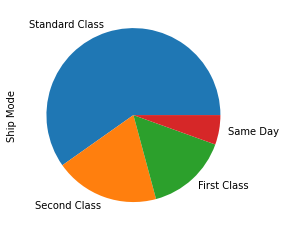

In [40]:
df['Ship Mode'].value_counts().plot.pie()

In [41]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

<AxesSubplot:ylabel='Segment'>

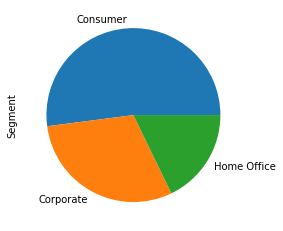

In [42]:
df['Segment'].value_counts().plot.pie()

In [44]:
df['Country'].value_counts()   # all the sales comes from USA 

United States    9800
Name: Country, dtype: int64

In [45]:
df['City'].value_counts()

New York City      891
Los Angeles        728
Philadelphia       532
San Francisco      500
Seattle            426
                  ... 
San Luis Obispo      1
Manhattan            1
Iowa City            1
Baytown              1
East Orange          1
Name: City, Length: 529, dtype: int64

<AxesSubplot:ylabel='City'>

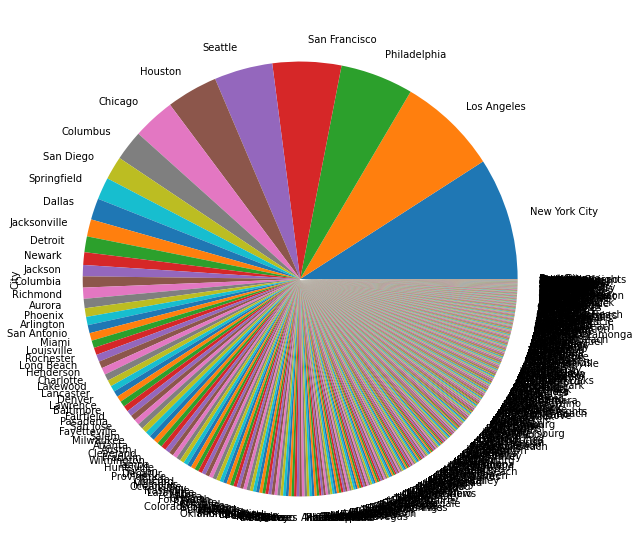

In [46]:
plt.figure(figsize=(15,10))
df['City'].value_counts().plot.pie()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Texas'),
  Text(1, 0, 'Illinois'),
  Text(2, 0, 'Pennsylvania'),
  Text(3, 0, 'Kentucky'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Georgia'),
  Text(6, 0, 'Virginia'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'Louisiana'),
  Text(9, 0, 'Ohio'),
  Text(10, 0, 'South Carolina'),
  Text(11, 0, 'Oregon'),
  Text(12, 0, 'Arizona'),
  Text(13, 0, 'Michigan'),
  Text(14, 0, 'Arkansas'),
  Text(15, 0, 'Tennessee'),
  Text(16, 0, 'Nevada'),
  Text(17, 0, 'South Dakota'),
  Text(18, 0, 'New York'),
  Text(19, 0, 'Wisconsin'),
  Text(20, 0, 'Florida'),
  Text(21, 0, 'Washington'),
  Text(22, 0, 'New Jersey'),
  Text(23, 0, 'Missouri'),
  Text(24, 0, 'Indiana'),
  Text(25, 0, 'North Carolina'),
  Text(26, 0, 'Colorado'),
  Text(27, 0, 'Utah'),
  Text(28, 0, 'Mississ

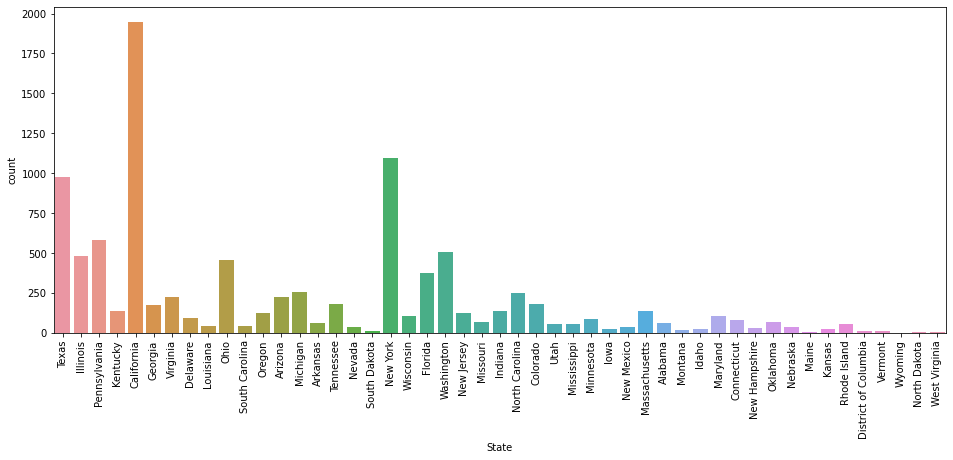

In [47]:
# Visualize category columns
plt.figure(figsize=(16,6))
sns.countplot('State' , data=df)
plt.xticks(rotation='vertical')

In [48]:
# top 10 stats
top_stats = df.groupby(['State']).sum().sort_values('Sales', ascending=False).head(10)
top_stats = top_stats[['Sales']].round(2)
top_stats.reset_index(inplace=True)
top_stats

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


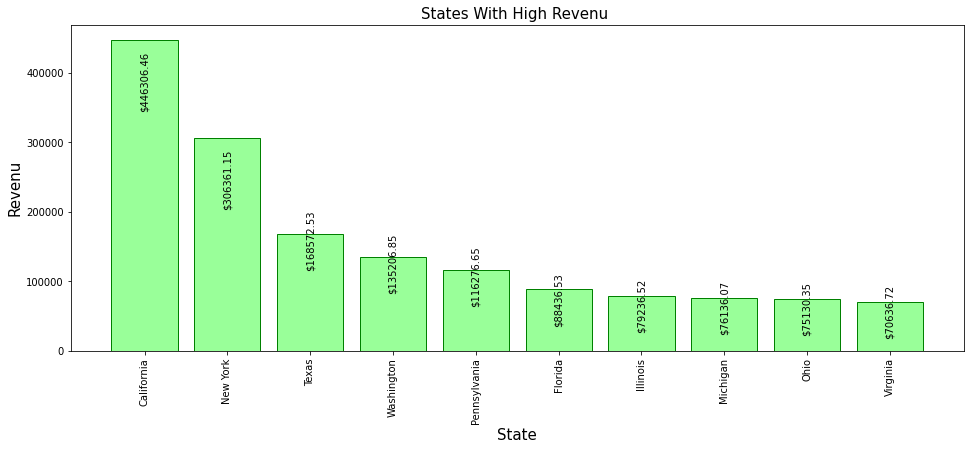

In [49]:
# visualize top 10 stats
plt.figure(figsize=(16,6))
plt.bar(top_stats['State'],top_stats['Sales'] ,color="#99ff99" , edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('States With High Revenu ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)

for k , v in top_stats['Sales'].items(): 
    if v > 200000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-50000,"$"+str(v),rotation=90,horizontalalignment='center')

In [50]:
# draw top 10 cities
top_city = df.groupby(['City']).sum().sort_values('Sales', ascending=False).head(10)
top_city = top_city[['Sales']].round(2)
top_city.reset_index(inplace=True)
top_city

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


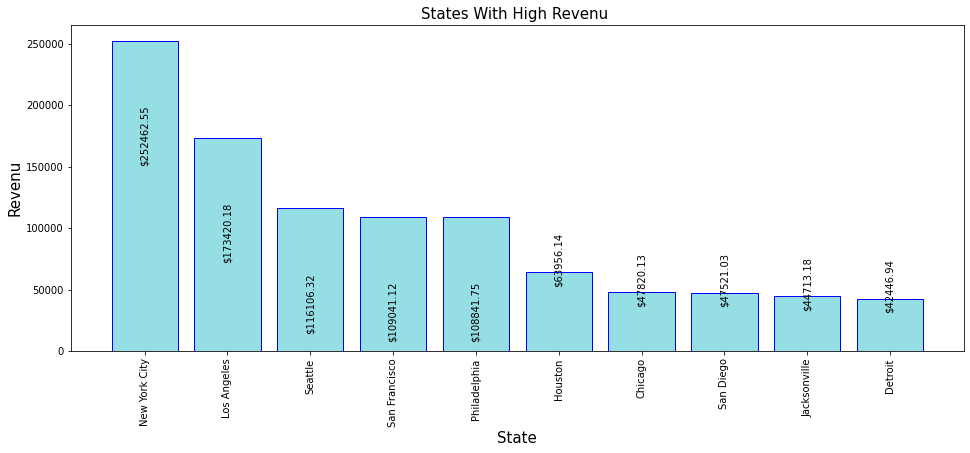

In [51]:
# visualize top 10 cities 
plt.figure(figsize=(16,6))
plt.bar(top_city['City'],top_city['Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('States With High Revenu ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)

for k , v in top_city['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$"+str(v),rotation=90,horizontalalignment='center')

In [52]:
# top 10 customers 
top_customers = df.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(10)
top_customers = top_customers[['Sales']].round(2)
top_customers.reset_index(inplace=True)
top_customers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


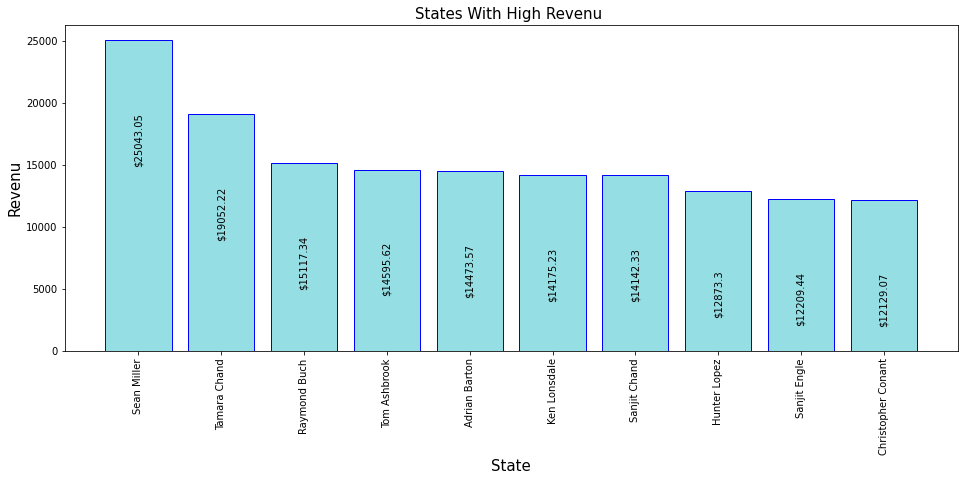

In [53]:
# visualize top 10 customers 
plt.figure(figsize=(16,6))
plt.bar(top_customers['Customer Name'],top_customers['Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('States With High Revenu ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)

for k , v in top_customers['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$"+str(v),rotation=90,horizontalalignment='center')

In [54]:
# show categories 
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [55]:
# how much sales in each category 
category_sales = df.groupby(['Category']).sum().sort_values('Sales',ascending=False)
category_sales.reset_index(inplace=True)
category_sales

,Category,Postal Code,Sales
0,Technology,100694078.0,827455.8730
1,Furniture,115548445.0,728658.5757
2,Office Supplies,324887441.0,705422.3340


([<matplotlib.patches.Wedge at 0x7f78e5c382d0>,
 [Text(0.4498857223734124, 1.003794220348251, 'Technology'),
  Text(-1.0842321085760298, -0.18558215090028554, 'Furniture'),
  Text(0.6127880326006169, -0.9135046946247543, 'Office Supplies')],
 [Text(0.24539221220367946, 0.547524120189955, '36.59%  ($827456)'),
  Text(-0.5913993319505617, -0.1012266277637921, '32.22%  ($728659)'),
  Text(0.3342480177821546, -0.4982752879771386, '31.19%  ($705422)')])

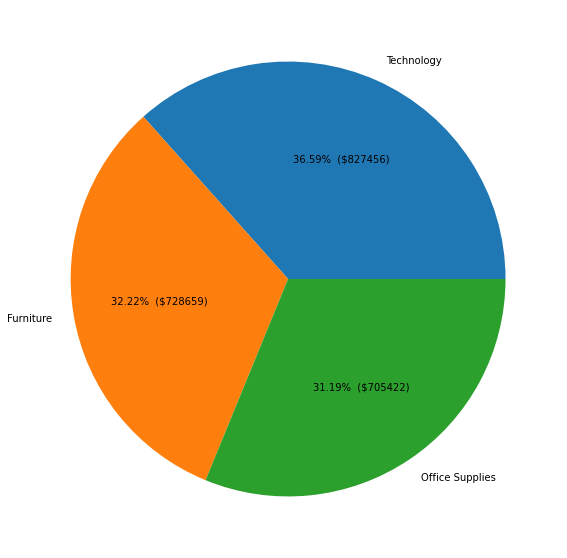

In [57]:
# Visualize Sales in each category 
plt.figure(figsize=(15,10))
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  (${v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct=make_autopct(category_sales['Sales']))

In [58]:
# top products 
top_products = df.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).head(5)
top_products.reset_index(inplace=True)
top_products

,Product Name,Postal Code,Sales
0,Canon imageCLASS 2200 Advanced Copier,194875.0,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,562064.0,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,32216.0,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,448062.0,21870.576
4,GBC DocuBind TL300 Electric Binding System,381549.0,19823.479


([<matplotlib.patches.Wedge at 0x7f78e5b90b10>,
 [Text(0.3346535699833834, 1.0478582862665051, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(-1.0982774609148707, 0.061535508825269966, 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
  Text(-0.6218355761767037, -0.907370109823432, 'Cisco TelePresence System EX90 Videoconferencing Unit'),
  Text(0.3364189321736005, -1.0472928444686207, 'HON 5400 Series Task Chairs for Big and Tall'),
  Text(1.0105710320151062, -0.43444929422422046, 'GBC DocuBind TL300 Electric Binding System')],
 [Text(0.18253831090002728, 0.5715590652362754, '40.16%  ($61600)'),
  Text(-0.5990604332262931, 0.0335648229956018, '17.90%  ($27453)'),
  Text(-0.33918304155092927, -0.494929150812781, '14.76%  ($22638)'),
  Text(0.1835012357310548, -0.5712506424374294, '14.26%  ($21871)'),
  Text(0.5512205629173307, -0.23697234230412023, '12.92%  ($19823)')])

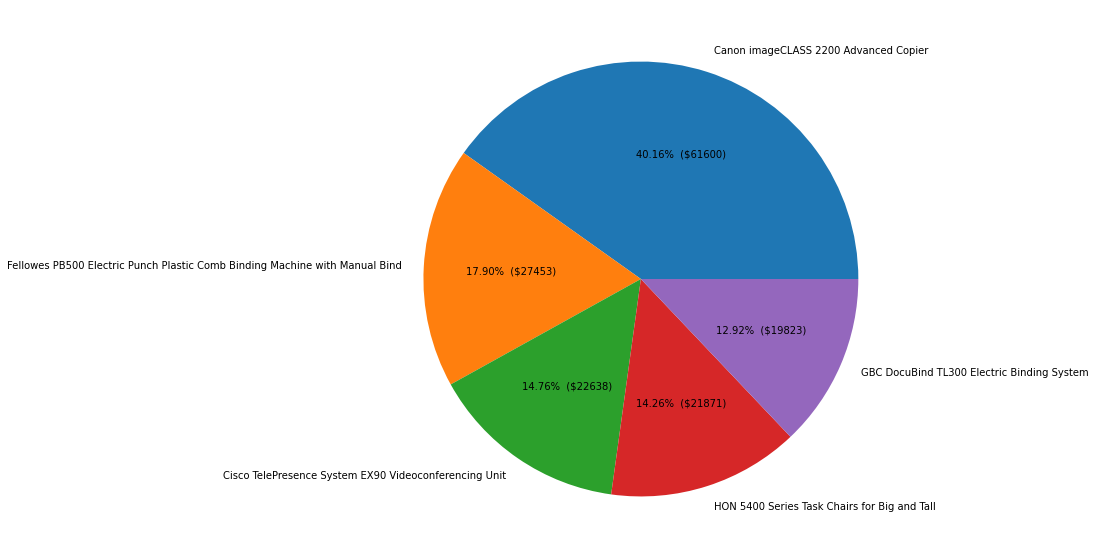

In [59]:
# sales in each product 
plt.figure(figsize=(15,10))
plt.pie(top_products['Sales'],labels=top_products['Product Name'],autopct=make_autopct(top_products['Sales']))

In [61]:
# create new columns from the order date , split the date into day , month ans year
df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

In [62]:
# now we have the new 3 columns 
df.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
5134,CA-2018-155607,2018-11-26,2018-11-30,Standard Class,FG-14260,Frank Gastineau,Home Office,United States,New York City,New York,10009.0,East,OFF-BI-10003364,Office Supplies,Binders,Binding Machine Supplies,93.344,26,11,2018
3769,CA-2015-153913,2015-12-16,2015-12-20,Second Class,KB-16585,Ken Black,Corporate,United States,Hialeah,Florida,33012.0,South,OFF-FA-10000490,Office Supplies,Fasteners,"OIC Binder Clips, Mini, 1/4"" Capacity, Black",1.984,16,12,2015
5769,CA-2016-154900,2016-02-25,2016-03-01,Standard Class,SS-20875,Sung Shariari,Consumer,United States,Leominster,Massachusetts,1453.0,East,OFF-PA-10002377,Office Supplies,Paper,Adams Telephone Message Book W/Dividers/Space ...,22.720,25,2,2016
7176,US-2018-141677,2018-03-26,2018-03-30,Standard Class,HK-14890,Heather Kirkland,Corporate,United States,Houston,Texas,77070.0,Central,OFF-ST-10000344,Office Supplies,Storage,"Neat Ideas Personal Hanging Folder Files, Black",32.232,26,3,2018
7461,US-2016-136987,2016-04-11,2016-04-14,Second Class,AR-10540,Andy Reiter,Consumer,United States,Los Angeles,California,90004.0,West,OFF-PA-10003127,Office Supplies,Paper,Easy-staple paper,52.760,11,4,2016


<AxesSubplot:ylabel='year'>

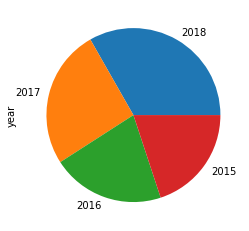

In [63]:
# show the orders over years
df['year'].value_counts().plot.pie()

In [64]:
# show the sales in each year 
year_sales = df.groupby(['year']).sum().sort_values('Sales',ascending=False)
year_sales.reset_index(inplace=True)
year_sales

,year,Postal Code,Sales,day,month
0,2018,183240705.0,722052.0192,50088,25286
1,2017,138200041.0,600192.5500,38533,19606
2,2015,110842145.0,479856.2081,30706,15351
3,2016,108847073.0,459436.0054,32444,16378


<BarContainer object of 4 artists>

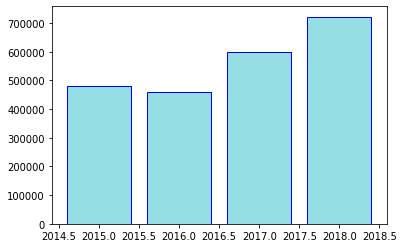

In [65]:
# visualize sales in each year 
plt.bar(year_sales['year'],year_sales['Sales'] ,color="#95dee3" , edgecolor='blue')

In [66]:
# sales 2016
x = df['year'] == 2015
df2 = df[x]
sales = df2.groupby(['month']).sum().sort_values(['Sales'], ascending=False)
sales.reset_index(inplace=True)
sales

,month,Postal Code,Sales,day,year
0,9,14461190.0,81623.5268,4216,538005
1,11,17527383.0,77907.6607,4637,616590
2,12,16158704.0,68167.0585,4696,552110
3,3,8230795.0,55205.7970,2522,310310
4,6,6579219.0,34322.9356,1990,263965
5,7,9031885.0,33781.5430,2308,286130
6,10,9703910.0,31453.3930,2529,320385
7,4,7318088.0,27906.8550,1822,261950
8,8,8097400.0,27117.5365,2172,294190
9,5,6422584.0,23644.3030,1988,243815


<BarContainer object of 12 artists>

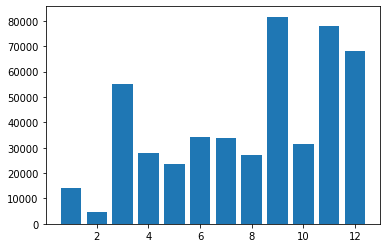

In [68]:
# show sales in each month year=2016
plt.bar(sales['month'] , sales['Sales'])

In [71]:
# function to get sales for each month in the 4 years

all_sales = []

years = [2015,2016,2017,2018]
for year in years : 
    x = df['year'] == year
    df2 = df[x]
    sales = df2.groupby(['month']).sum() #.sort_values(['Sales'], ascending=False)
    sales.reset_index(inplace=True)
    all_sales.append([year,sales['Sales']])
    
x = df['year'] == 2015
df2 = df[x]
sales = df2.groupby(['month']).sum().sort_values(['Sales'], ascending=False)
sales.reset_index(inplace=True)
all_sales

[[2015,
  0     14205.7070
  1      4519.8920
  2     55205.7970
  3     27906.8550
  4     23644.3030
  5     34322.9356
  6     33781.5430
  7     27117.5365
  8     81623.5268
  9     31453.3930
  10    77907.6607
  11    68167.0585
  Name: Sales, dtype: float64],
 [2016,
  0     18066.9576
  1     11951.4110
  2     32339.3184
  3     34154.4685
  4     29959.5305
  5     23599.3740
  6     28608.2590
  7     36818.3422
  8     63133.6060
  9     31011.7375
  10    75249.3995
  11    74543.6012
  Name: Sales, dtype: float64],
 [2017,
  0     18542.4910
  1     22978.8150
  2     51165.0590
  3     38679.7670
  4     56656.9080
  5     39724.4860
  6     38320.7830
  7     30542.2003
  8     69193.3909
  9     59583.0330
  10    79066.4958
  11    95739.1210
  Name: Sales, dtype: float64],
 [2018,
  0      43476.4740
  1      19920.9974
  2      58863.4128
  3      35541.9101
  4      43825.9822
  5      48190.7277
  6      44825.1040
  7      62837.8480
  8      86152.8880
  9     

In [72]:
# show sales in each year with months detail 
my_sales = df.groupby([('year'),('month')]).sum()
my_sales.reset_index(inplace=True)
my_sales

,year,month,Postal Code,Sales,day
0,2015,1,4261212.0,14205.7070,1264
1,2015,2,3049775.0,4519.8920,562
2,2015,3,8230795.0,55205.7970,2522
3,2015,4,7318088.0,27906.8550,1822
4,2015,5,6422584.0,23644.3030,1988
5,2015,6,6579219.0,34322.9356,1990
6,2015,7,9031885.0,33781.5430,2308
7,2015,8,8097400.0,27117.5365,2172
8,2015,9,14461190.0,81623.5268,4216
9,2015,10,9703910.0,31453.3930,2529


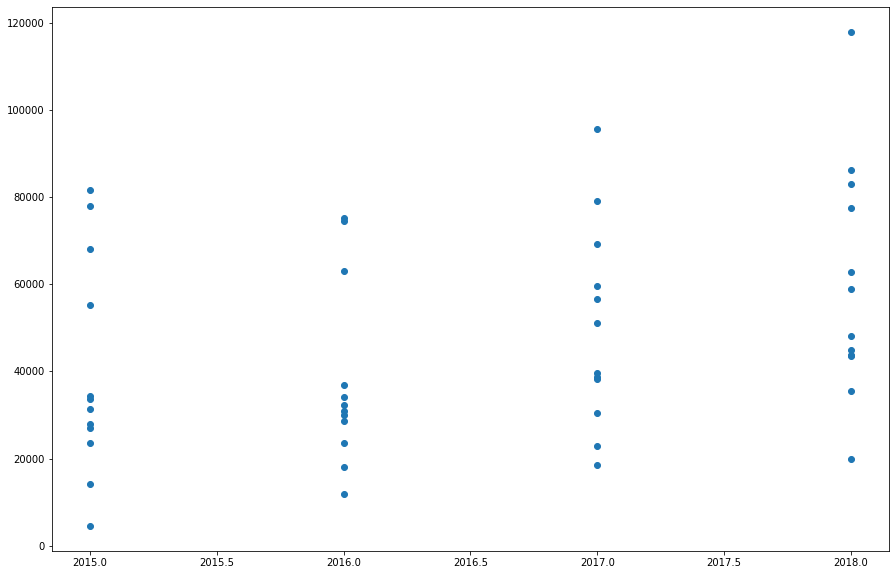

In [74]:
# draw the sales as scatter to get the highest sales in each year  
plt.figure(figsize=(15,10))
plt.scatter(my_sales['year'],my_sales['Sales'])

<BarContainer object of 48 artists>

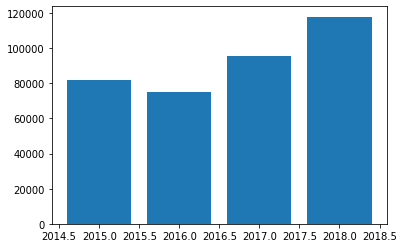

In [76]:
# another way to show it but the scatter is better 
plt.bar(my_sales['year'],my_sales['Sales'])

now i will get the sales for each year alone , because i want to draw all the years in one detaild chart , i know i can do this in a simple way using functions , but i wanted to keep it very simple so that people understand it easily 

In [77]:
# get 2015 sales 
x = df['year'] == 2015
df2 = df[x]
sales = df2.groupby(['month']).sum()
sales.reset_index(inplace=True)
sales_2015 = [round(x,2) for x in list(sales['Sales'])]
sales_2015

[14205.71,
 4519.89,
 55205.8,
 27906.85,
 23644.3,
 34322.94,
 33781.54,
 27117.54,
 81623.53,
 31453.39,
 77907.66,
 68167.06]

In [78]:
# get 2016 sales 
x = df['year'] == 2016
df2 = df[x]
sales = df2.groupby(['month']).sum()
sales.reset_index(inplace=True)
sales_2016 = [round(x,2) for x in list(sales['Sales'])]
sales_2016

[18066.96,
 11951.41,
 32339.32,
 34154.47,
 29959.53,
 23599.37,
 28608.26,
 36818.34,
 63133.61,
 31011.74,
 75249.4,
 74543.6]

In [79]:
# get 2017 sales 
x = df['year'] == 2017
df2 = df[x]
sales = df2.groupby(['month']).sum()
sales.reset_index(inplace=True)
sales_2017 = [round(x,2) for x in list(sales['Sales'])]
sales_2017

[18542.49,
 22978.82,
 51165.06,
 38679.77,
 56656.91,
 39724.49,
 38320.78,
 30542.2,
 69193.39,
 59583.03,
 79066.5,
 95739.12]

In [80]:
# get 2018 sales 
x = df['year'] == 2018
df2 = df[x]
sales = df2.groupby(['month']).sum()
sales.reset_index(inplace=True)
sales_2018 = [round(x,2) for x in list(sales['Sales'])]
sales_2018

[43476.47,
 19921.0,
 58863.41,
 35541.91,
 43825.98,
 48190.73,
 44825.1,
 62837.85,
 86152.89,
 77448.13,
 117938.15,
 83030.39]

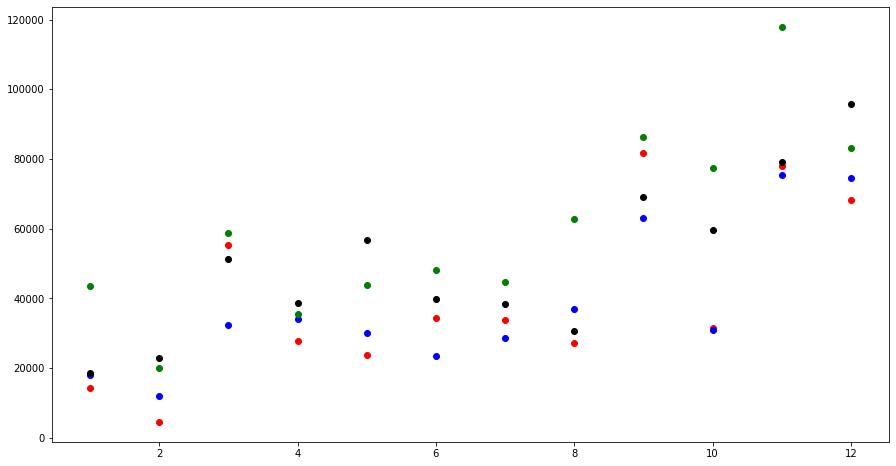

In [81]:
# draw all the months in all the years in a good way so that we can see the differences between them 
import numpy as np


plt.figure(figsize=(15,8))

#day one, the age and speed of 13 cars:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array(sales_2015)
plt.scatter(x, y , color = 'red')

#day two, the age and speed of 15 cars:
y = np.array(sales_2016)
plt.scatter(x, y , color = 'blue')



y = np.array(sales_2017)
plt.scatter(x, y , color = 'black')


y = np.array(sales_2018)
plt.scatter(x, y , color = 'green')

plt.show()

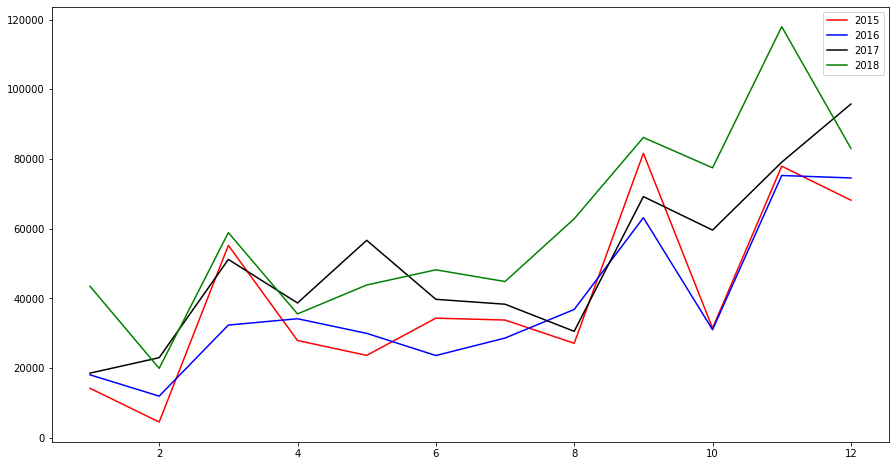

In [82]:
# the same chart but in another way
plt.figure(figsize=(15,8))

#day one, the age and speed of 13 cars:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array(sales_2015)
plt.plot(x, y , color = 'red' ,label='2015')


#day two, the age and speed of 15 cars:
y = np.array(sales_2016)
plt.plot(x, y , color = 'blue' ,label='2016')



y = np.array(sales_2017)
plt.plot(x, y , color = 'black',label='2017')


y = np.array(sales_2018)
plt.plot(x, y , color = 'green' , label='2018')

plt.legend()
plt.show()